# Fateme Fouladi

# Q2: Face Images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

In [2]:
# load datasets
train_df=pd.read_csv('Homework 04\\Dataset\\train.csv')
test_df=pd.read_csv('Homework 04\\Dataset\\test.csv')
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,52,42,34,28,25,21,20,16,12,8,...,69,69,66,68,74,79,72,75,82,80
1,79,80,68,61,61,65,64,60,58,57,...,104,91,88,100,115,123,127,127,127,131
2,138,133,136,145,149,151,153,154,159,162,...,19,17,17,17,18,16,18,20,22,23
3,120,106,128,137,132,139,141,126,97,92,...,95,82,44,34,28,28,29,27,26,27
4,136,146,156,163,168,170,170,171,170,167,...,56,57,54,52,57,54,55,55,56,55


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 4096 entries, 0 to 4095
dtypes: int64(4096)
memory usage: 9.4 MB


we define a function to perform PCA and calculate MSE

In [4]:
# Define a function to apply PCA and calculate MSE
def apply_pca_and_calculate_mse(n_components, X_train, X_test):
    # Apply PCA 
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)

    # Inverse transform to get back the original dimension for calculating MSE
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    # Calculate MSE for testing sets
    mse_test = mean_squared_error(X_test, X_test_reconstructed)

    return mse_test

Now we use our function to applying PCA with different number of components and we use 5 folds cross validation with 10 iterations.

We deleted 300 and 500 from component list, becuase we can apply PCA for reducing dimensions between 1 and min(n_samples, n_features).

In [5]:
X_train = train_df.values

# different numbers of components for PCA
components_list = [3, 8, 15, 30, 45, 70, 100, 140, 200]

# repeated 5-fold cross-validation with 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# list to store MSEs for each number of components for validation data
mse_test_results = []

for n_components in components_list:
    # list for store MSEs 
    mse_test_list = []

    # Loop through different folds and repeats
    for train_index, test_index in rkf.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        
        mse_test = apply_pca_and_calculate_mse(n_components, X_train_fold, X_test_fold)

        mse_test_list.append(mse_test)
    mse_test_results.append(mse_test_list)
    
    #  mean MSE over all folds and repeats
    mean_mse_test = np.mean(mse_test_list)

    print(f'Number of Components: {n_components},  Mean MSE (validation): {mean_mse_test:.4f}')

Number of Components: 3,  Mean MSE (validation): 629.2403
Number of Components: 8,  Mean MSE (validation): 463.5841
Number of Components: 15,  Mean MSE (validation): 361.1079
Number of Components: 30,  Mean MSE (validation): 264.4687
Number of Components: 45,  Mean MSE (validation): 225.9284
Number of Components: 70,  Mean MSE (validation): 190.8822
Number of Components: 100,  Mean MSE (validation): 166.5722
Number of Components: 140,  Mean MSE (validation): 147.0620
Number of Components: 200,  Mean MSE (validation): 128.7272


Now we plot MSEs with boxplots

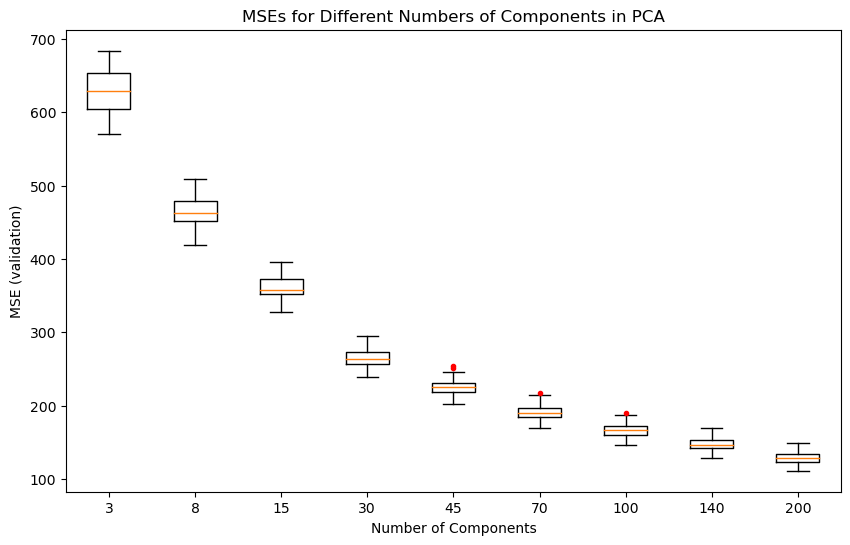

In [6]:
# Plot boxplots for MSEs
plt.figure(figsize=(10, 6))
plt.boxplot(mse_test_results, labels=components_list, positions=np.array(range(len(components_list))) + 0.2, sym='r.')
plt.xlabel('Number of Components')
plt.ylabel('MSE (validation)')
plt.title('MSEs for Different Numbers of Components in PCA')
plt.show()

According to this plot the MSE for PCA with 200 number of components is less than others and it works better. I choose this model for applying on the test dataset but we can choose the model with 140 number of components that is simpler and works good.

# 2

Then we apply this model on test dataset and calculate MSE

In [12]:
X_test=test_df.values
pca = PCA(n_components=200)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)
X_test_reconstructed = pca.inverse_transform(X_test_pca)
mse = mean_squared_error(X_test, X_test_reconstructed)
print(f'The MSE between the original and reconstructed test data(with 200 components) is: {mse}')

The MSE between the original and reconstructed test data(with 200 components) is: 118.09296199733359


# 3

Here we plot 10 first images of test dataset and their reconstructions to figure out how much information we lost.

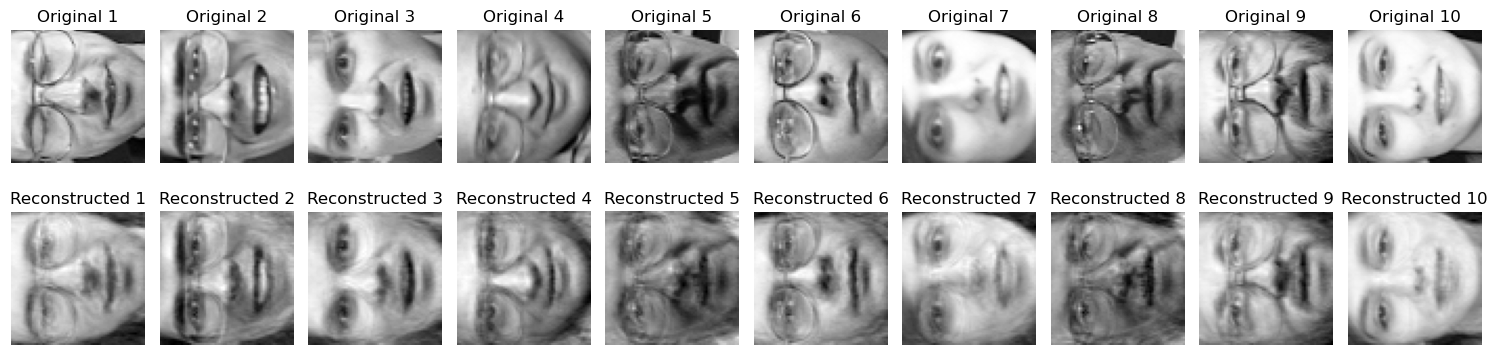

In [9]:
# Choose the first 10 original images their reconstructions for plotting

num_images = 10
original_images = X_test[:num_images]
reconstructed_images = X_test_reconstructed[:num_images]

image_shape = (64, 64)  
original_images = original_images.reshape((-1,) + image_shape)
reconstructed_images = reconstructed_images.reshape((-1,) + image_shape)

# Plot
fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(15, 4))

for i in range(num_images):
    axes[0, i].imshow(original_images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i + 1}')

    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Reconstructed {i + 1}')

plt.tight_layout()
plt.show()